In [1]:
import os
import sys


os.environ['SPARK_HOME'] = "C:\opt\spark\spark-2.4.7-bin-hadoop2.7"


sys.path.append("C:\opt\spark\spark-2.4.7-bin-hadoop2.7")
sys.path.append("C:\opt\spark\spark-2.4.7-bin-hadoop2.7\python\lib\py4j-0.10.7-src.zip")

try:
    from pyspark import SparkContext
    from pyspark import SparkConf

    print ("success")

except ImportError as e:
    print ("error importing spark modules", e)
    sys.exit(1)
    

success


In [3]:
#connectionProperties = { "Driver": "com.microsoft.sqlserver.jdbc.SQLServerDriver" }
from pyspark.sql.functions import col, isnull, lit, to_timestamp, expr, split, trim, regexp_replace, when


In [4]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [32]:
url = "https://github.com/jayjonesvip/pyspark-fantasy-football/raw/main/player_stats_2021.csv"

from pyspark import SparkFiles

spark.sparkContext.addFile(url)

df = spark.read.csv(SparkFiles.get("player_stats_2021.csv"), header=True)

In [34]:
#df = spark.read.parquet('2021_stats')
df.limit(12).toPandas()

,player_id,player_name,recent_team,season,week,season_type,completions,attempts,passing_yards,passing_tds,...,receiving_first_downs,receiving_epa,receiving_2pt_conversions,racr,target_share,air_yards_share,wopr,special_teams_tds,fantasy_points,fantasy_points_ppr
0,00-0019596,T.Brady,TB,2021,1,REG,32,50,379,4,...,0,NA,0,NA,NA,NA,NA,0,27.16,27.16
1,00-0019596,T.Brady,TB,2021,2,REG,24,36,276,5,...,0,NA,0,NA,NA,NA,NA,0,29.64,29.64
2,00-0019596,T.Brady,TB,2021,3,REG,41,55,432,1,...,0,NA,0,NA,NA,NA,NA,0,28.68,28.68
3,00-0019596,T.Brady,TB,2021,4,REG,22,43,269,0,...,0,NA,0,NA,NA,NA,NA,0,11.06,11.06
4,00-0019596,T.Brady,TB,2021,5,REG,30,41,411,5,...,0,NA,0,NA,NA,NA,NA,0,37.739999999999995,37.739999999999995
5,00-0019596,T.Brady,TB,2021,6,REG,34,42,297,2,...,0,NA,0,NA,NA,NA,NA,0,17.980000000000004,17.980000000000004
6,00-0019596,T.Brady,TB,2021,7,REG,20,36,211,4,...,0,NA,0,NA,NA,NA,NA,0,24.439999999999998,24.439999999999998
7,00-0019596,T.Brady,TB,2021,8,REG,28,40,375,4,...,0,NA,0,NA,NA,NA,NA,0,25.2,25.2
8,00-0019596,T.Brady,TB,2021,10,REG,23,34,220,2,...,0,NA,0,NA,NA,NA,NA,0,13,13
9,00-0019596,T.Brady,TB,2021,11,REG,30,46,307,2,...,0,NA,0,NA,NA,NA,NA,0,19.28,19.28


In [35]:
import pyspark.sql.functions as F

stats = (
    
    df
    .withColumn('Team', col('recent_team'))
    .withColumn('PlayerName', col('player_name'))
    .withColumn('PlayerNameSplit', split(trim(df['player_name']), "."))
    
    .withColumnRenamed('attempts','Attempts')
    .withColumnRenamed('completions','PassingCompletions')
    .withColumnRenamed('passing_yards','PassingYards')
    .withColumnRenamed('passing_tds','PassingTouchdowns')
    
    #.withColumnRenamed('Att12','RushingAttempts')
    .withColumnRenamed('rushing_yards','RushingYards')
    .withColumnRenamed('rushing_tds','RushingTouchdowns')        
    
    .withColumnRenamed('targets','Targets')
    .withColumnRenamed('receptions','Receptions')    
    .withColumnRenamed('receiving_yards','ReceivingYards')
    .withColumnRenamed('receiving_tds','ReceivingTouchdowns') 
    
    .withColumnRenamed('fantasy_points','ppg')
 
)



stats = (
 stats
 #   .withColumn('Position',  stats.PlayerNameSplit.getItem(F.size(stats.PlayerNameSplit)-3))
#    .withColumn('PlayerName', regexp_replace(regexp_replace(regexp_replace(regexp_replace(stats.PlayerName,'QB',''),'RB',''),'WR',''),'TE',''))
    .withColumn('ppg', col('ppg').cast('float'))
    #.withColumn('GamesPlayed', col('GamesPlayed').cast('int'))
    
    .withColumn('Attempts', col('Attempts').cast('int'))
    .withColumn('PassingCompletions', col('PassingCompletions').cast('int'))
    .withColumn('PassingYards', col('PassingYards').cast('int'))
    .withColumn('PassingTouchdowns', col('PassingTouchdowns').cast('int'))
    
 #   .withColumn('RushingAttempts', col('RushingAttempts').cast('int'))
    .withColumn('RushingYards', col('RushingYards').cast('int'))
    .withColumn('RushingTouchdowns', col('RushingTouchdowns').cast('int'))
    
    .withColumn('Targets', col('Targets').cast('int'))
    .withColumn('Receptions', col('Receptions').cast('int'))
    .withColumn('ReceivingYards', col('ReceivingYards').cast('int'))
    .withColumn('ReceivingTouchdowns', col('ReceivingTouchdowns').cast('int'))
    
    
    .select('PlayerName', 'week', 'Team','Attempts', 'PassingCompletions','PassingYards','PassingTouchdowns', 'RushingYards','RushingTouchdowns','Targets', 'Receptions', 'ReceivingYards','ReceivingTouchdowns', 'ppg')
)



stats = (
    stats
        .withColumn('Total', (stats.PassingYards / 20) + 
                    (stats.PassingTouchdowns * 4) + 
                    (stats.RushingYards / 10) +                    
                    (stats.RushingTouchdowns * 6) +
                    (stats.Receptions / 2) +
                    (stats.ReceivingYards / 10) +
                    (stats.ReceivingTouchdowns * 6)                     
                   )
)

#stats.withColumn('PPG', stats.Total / stats.GamesPlayed)

stats = (
    stats
        .withColumn('touches', (stats.Attempts + stats.Receptions+ stats.Targets) )
).filter('ppg >= 2')


stats = stats.withColumn('ppt', stats.touches)

stats.orderBy(col("touches").desc()).toPandas()
#stats.cache
#stats.createOrReplaceTempView("player")
#spark.catalog.cacheTable("player")


,PlayerName,week,Team,Attempts,PassingCompletions,PassingYards,PassingTouchdowns,RushingYards,RushingTouchdowns,Targets,Receptions,ReceivingYards,ReceivingTouchdowns,ppg,Total,touches,ppt
0,J.Herbert,18,LAC,64,34,383,3,1,0,0,0,0,0,27.42,31.25,64,64
1,B.Roethlisberger,3,PIT,58,38,318,1,5,0,0,0,0,0,13.22,20.40,58,58
2,D.Prescott,1,DAL,58,42,403,3,13,0,0,0,0,0,27.42,33.45,58,58
3,J.Goff,1,DET,57,38,338,3,14,0,0,0,0,0,28.92,30.30,57,57
4,D.Carr,1,LV,56,34,435,2,6,0,0,0,0,0,24.00,30.35,56,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3718,C.Golston,16,DAL,0,0,0,0,0,0,0,0,0,0,6.00,0.00,0,0
3719,T.Sermon,4,SF,0,0,0,0,89,0,0,0,0,0,8.90,8.90,0,0
3720,N.Wright,10,DAL,0,0,0,0,0,0,0,0,0,0,6.00,0.00,0,0
3721,J.Williams,9,DEN,0,0,0,0,111,0,0,0,0,0,11.10,11.10,0,0


In [36]:
all_df = stats.toPandas()
#rb_df = stats.filter("Position = 'RB'").where(stats.ppg>5).sort(stats.ppg.desc()).toPandas()
#wr_df = stats.filter("Position = 'WR'").where(stats.ppg>5).toPandas()
#te_df = stats.filter("Position = 'TE'").where(stats.ppg>5).toPandas()
#qb_df = stats.filter("Position = 'QB'").where(stats.ppg>5).toPandas()

all_df = all_df.filter('ppg > 0')

In [37]:
type(stats)
stats.toPandas()

,PlayerName,week,Team,Attempts,PassingCompletions,PassingYards,PassingTouchdowns,RushingYards,RushingTouchdowns,Targets,Receptions,ReceivingYards,ReceivingTouchdowns,ppg,Total,touches,ppt
0,T.Brady,1,TB,50,32,379,4,0,0,0,0,0,0,27.160000,34.95,50,50
1,T.Brady,2,TB,36,24,276,5,6,0,0,0,0,0,29.639999,34.40,36,36
2,T.Brady,3,TB,55,41,432,1,14,1,0,0,0,0,28.680000,33.00,55,55
3,T.Brady,4,TB,43,22,269,0,3,0,0,0,0,0,11.060000,13.75,43,43
4,T.Brady,5,TB,41,30,411,5,13,0,0,0,0,0,37.740002,41.85,41,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3718,Z.Wilson,14,NYJ,42,19,202,0,33,0,0,0,0,0,11.380000,13.40,42,42
3719,Z.Wilson,15,NYJ,23,13,170,0,12,1,1,0,0,0,12.000000,15.70,24,24
3720,Z.Wilson,16,NYJ,22,14,102,1,91,1,0,0,0,0,23.180000,24.20,22,22
3721,Z.Wilson,17,NYJ,33,19,234,1,0,0,0,0,0,0,13.360000,15.70,33,33


In [47]:
stats_2021 = stats

In [48]:
from pyspark.sql import functions as F
from pyspark.sql.window import Window


points_window = Window.partitionBy("week").orderBy(col("Total").desc())
stats_2021 = stats_2021.withColumn("next_points",  F.lead(stats_2021.ppg).over(points_window))
stats_2021 = stats_2021.withColumn("diff", (stats_2021.next_points - stats_2021.ppg) *-1)
stats_2021 = stats_2021.withColumn("diffpct", F.when(F.isnull(stats_2021.next_points), 0).otherwise((((stats_2021.next_points - stats_2021.ppg) / stats_2021.next_points) * 100)*-1  ))

stats_2021.orderBy(col("touches").desc()).limit(15).toPandas()

,PlayerName,week,Team,Attempts,PassingCompletions,PassingYards,PassingTouchdowns,RushingYards,RushingTouchdowns,Targets,Receptions,ReceivingYards,ReceivingTouchdowns,ppg,Total,touches,ppt,next_points,diff,diffpct
0,J.Herbert,18,LAC,64,34,383,3,1,0,0,0,0,0,27.420000,31.25,64,64,24.020000,3.400000,14.154869
1,B.Roethlisberger,3,PIT,58,38,318,1,5,0,0,0,0,0,13.220000,20.40,58,58,11.600000,1.620000,13.965516
2,D.Prescott,1,DAL,58,42,403,3,13,0,0,0,0,0,27.420000,33.45,58,58,25.900000,1.520000,5.868728
3,J.Goff,1,DET,57,38,338,3,14,0,0,0,0,0,28.920000,30.30,57,57,27.059999,1.860001,6.873617
4,D.Carr,1,LV,56,34,435,2,6,0,0,0,0,0,24.000000,30.35,56,56,28.920000,-4.920000,-17.012448
5,T.Brady,3,TB,55,41,432,1,14,1,0,0,0,0,28.680000,33.00,55,55,29.520000,-0.840000,-2.845529
6,J.Allen,14,BUF,54,36,308,2,109,1,0,0,0,0,35.220001,40.30,54,54,34.200001,1.020000,2.982457
7,T.Lawrence,8,JAX,54,32,238,1,11,0,0,0,0,0,12.620000,17.00,54,54,13.800000,-1.180000,-8.550727
8,P.Mahomes,5,KC,54,33,272,2,61,0,0,0,0,0,18.980000,27.70,54,54,21.900000,-2.920000,-13.333334
9,T.Brady,20,TB,54,30,329,1,0,0,0,0,0,0,13.160000,20.45,54,54,15.600000,-2.440001,-15.641029


In [49]:
from pyspark.sql import functions as F
from pyspark.sql.window import Window


age_window = Window.partitionBy("PlayerName","week").orderBy("Team")
stats = stats.withColumn("prev_points",  F.when(F.isnull( F.lag(stats.ppg).over(age_window)),stats.ppg).otherwise(F.lag(stats.ppg).over(age_window)) )
stats = stats.withColumn("diff", F.when(F.isnull(stats.ppg - stats.prev_points), 0).otherwise(stats.ppg - stats.prev_points))
stats = stats.withColumn("diffpct", F.when(F.isnull(stats.prev_points), 0).otherwise(((stats.prev_points - stats.ppg) / stats.prev_points)   ))

stats.toPandas()


,PlayerName,week,Team,Attempts,PassingCompletions,PassingYards,PassingTouchdowns,RushingYards,RushingTouchdowns,Targets,Receptions,ReceivingYards,ReceivingTouchdowns,ppg,Total,touches,ppt,prev_points,diff,diffpct
0,C.Brate,3,TB,0,0,0,0,0,0,5,4,35,0,3.500000,5.5,9,9,3.500000,0.0,0.0
1,C.Carson,4,SEA,0,0,0,0,30,0,1,1,1,0,3.100000,3.6,2,2,3.100000,0.0,0.0
2,C.Manhertz,1,JAX,0,0,0,0,0,0,1,1,22,1,8.200000,8.7,2,2,8.200000,0.0,0.0
3,C.Newton,14,CAR,23,15,178,0,47,1,0,0,0,0,13.820000,19.6,23,23,13.820000,0.0,0.0
4,D.Adams,14,GB,0,0,0,0,0,0,13,10,121,2,24.100000,29.1,23,23,24.100000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3718,Mi.Carter,17,NYJ,0,0,0,0,54,0,1,1,9,0,6.300000,6.8,2,2,6.300000,0.0,0.0
3719,S.Anderson,16,LAC,0,0,0,0,0,0,2,2,34,0,3.400000,4.4,4,4,3.400000,0.0,0.0
3720,S.Barkley,2,NYG,0,0,0,0,57,0,3,2,12,0,6.900000,7.9,5,5,6.900000,0.0,0.0
3721,T.Higgins,13,CIN,0,0,0,0,0,0,14,9,138,1,19.799999,24.3,23,23,19.799999,0.0,0.0


In [50]:
stats.printSchema()

root
 |-- PlayerName: string (nullable = true)
 |-- week: string (nullable = true)
 |-- Team: string (nullable = true)
 |-- Attempts: integer (nullable = true)
 |-- PassingCompletions: integer (nullable = true)
 |-- PassingYards: integer (nullable = true)
 |-- PassingTouchdowns: integer (nullable = true)
 |-- RushingYards: integer (nullable = true)
 |-- RushingTouchdowns: integer (nullable = true)
 |-- Targets: integer (nullable = true)
 |-- Receptions: integer (nullable = true)
 |-- ReceivingYards: integer (nullable = true)
 |-- ReceivingTouchdowns: integer (nullable = true)
 |-- ppg: float (nullable = true)
 |-- Total: double (nullable = true)
 |-- touches: integer (nullable = true)
 |-- ppt: integer (nullable = true)
 |-- prev_points: float (nullable = true)
 |-- diff: float (nullable = true)
 |-- diffpct: double (nullable = true)



In [51]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")


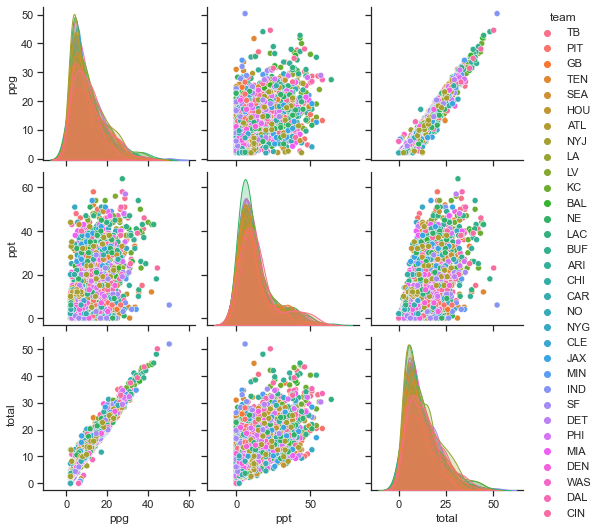

In [52]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(stats.select('team','ppg','ppt', 'total').toPandas(), hue="team")

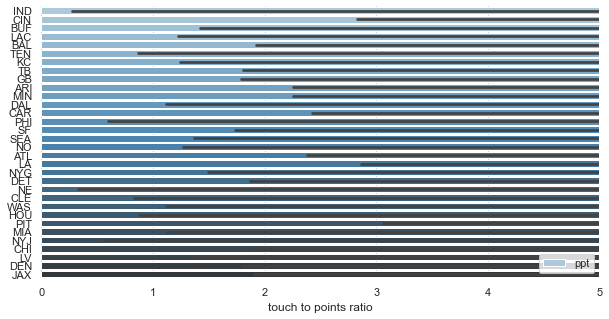

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")


#top_rb_df = stats_2020.head(10)
top_rb_df = stats_2021.orderBy(col("ppg").desc()).toPandas()


# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 5))

# Plot the crashes where alcohol was involved
sns.barplot(x="ppt", y="Team", label="ppt", data=top_rb_df, ci="sd", palette="Blues_d")



# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 5), ylabel="",
       xlabel="touch to points ratio")
sns.despine(left=True, bottom=True)

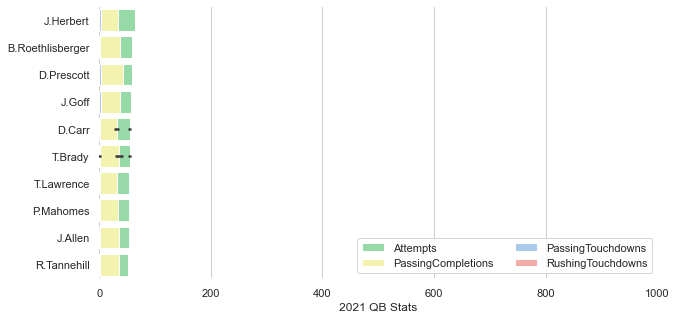

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")


top_qb_df = stats_2021.orderBy(col("ppt").desc()).toPandas().head(12)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 5))


sns.set_color_codes("pastel")
sns.barplot(x="Attempts", y="PlayerName", data=top_qb_df,
            label="Attempts", color="g")

sns.set_color_codes("pastel")
sns.barplot(x="PassingCompletions", y="PlayerName", data=top_qb_df,
            label="PassingCompletions", color="y")

sns.set_color_codes("pastel")
sns.barplot(x="PassingTouchdowns", y="PlayerName", data=top_qb_df,
            label="PassingTouchdowns", color="b")


sns.set_color_codes("pastel")
sns.barplot(x="RushingTouchdowns", y="PlayerName", data=top_qb_df,
            label="RushingTouchdowns", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1000), ylabel="",
       xlabel="2021 QB Stats")
sns.despine(left=True, bottom=True)